In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

import time

# custom functions
from functions import *
from bert_vectorizer import BertVectorizer

import os
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'

2024-11-23 17:21:37.529169: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732378897.549432   60598 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732378897.555172   60598 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-23 17:21:37.574258: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('../data/clean/dataset.csv').fillna('').sample(frac=1, random_state=314).reset_index(drop=True)

In [3]:
df

,name,url,title,lemmes,funny
0,la_depeche,https://www.ladepeche.fr/2024/09/29/145-person...,145 personnes ont donné leur sang en trois jours,personne donner sang jour,0
1,le_parisien,https://www.leparisien.fr/essonne-91/juvisy-su...,Juvisy-sur-Orge : il crache sur des policiers ...,juvisy-sur-orge cracher policier annoncer sero...,0
2,le_parisien,https://www.leparisien.fr/faits-divers/8-avril...,8 avril 1979 : le « tueur de l’Oise » arrêté...,avril tueur oise arrete assassin eter gendarme,0
3,la_depeche,https://www.ladepeche.fr/2024/10/09/grande-soi...,"Grande soirée théâtre, samedi 19",grand soiree theatre samedi,0
4,franceinfotv,https://www.francetvinfo.fr/les-jeux-olympique...,"Paris 2024 : près de 10 000 défilants, accès g...",paris defilant acces gratuit best of musical f...,0
...,...,...,...,...,...
106557,la_depeche,https://www.ladepeche.fr/2024/10/16/randonnee-...,Randonnée de la pleine lune,randonnee plein lune,0
106558,rfi,https://www.rfi.fr/fr/podcasts/la-marche-du-mo...,Tchad : quand les femmes prennent la voix du s...,tchad femme prendre voix syndicat,0
106559,rfi,https://www.rfi.fr/fr/podcasts/le-journal-d-ou...,Journal d'Outre-mer du 20 septembre 2024,journal outre-mer septembre,0
106560,le_parisien,https://www.leparisien.fr/val-de-marne-94/val-...,Val-de-Marne : le pont de Sucy-en-Brie rouvre ...,val-de-marne pont sucy-en-brie rouvrir circula...,0


In [4]:
embeddings = BertVectorizer().fit_transform(list(df.title))

I0000 00:00:1732378906.741491   60598 gpu_process_state.cc:201] Using CUDA malloc Async allocator for GPU: 0
I0000 00:00:1732378906.741713   60598 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1730 MB memory:  -> device: 0, name: NVIDIA GeForce MX150, pci bus id: 0000:01:00.0, compute capability: 6.1
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFCamembertModel: ['lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing TFCamembertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFCamembertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassi

<Figure size 800x600 with 0 Axes>

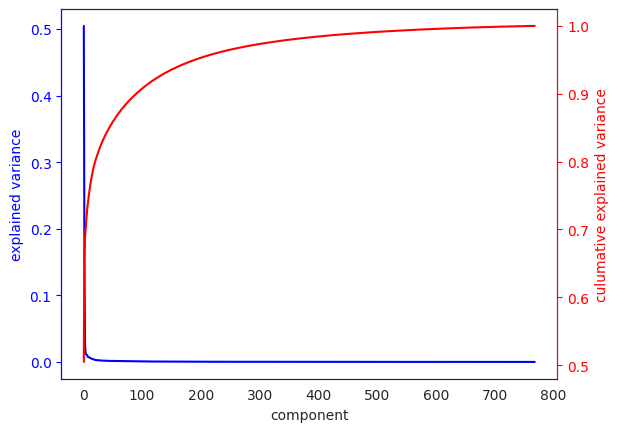

In [5]:
pca_graph(embeddings)

In [6]:
y = df.funny

In [7]:
mapper = umap.UMAP(n_components=2, n_jobs=-1, verbose=1, random_state=314).fit(embeddings)    

/home/michael/.pyenv/versions/funnypress-data-study/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP(n_jobs=1, random_state=314, verbose=1)
Sat Nov 23 17:43:49 2024 Construct fuzzy simplicial set
Sat Nov 23 17:43:49 2024 Finding Nearest Neighbors
Sat Nov 23 17:43:49 2024 Building RP forest with 21 trees
Sat Nov 23 17:44:06 2024 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	 4  /  17
	 5  /  17
	 6  /  17
	Stopping threshold met -- exiting after 6 iterations
Sat Nov 23 17:44:38 2024 Finished Nearest Neighbor Search
Sat Nov 23 17:44:42 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Nov 23 17:46:15 2024 Finished embedding


In [8]:
umap_embedding = mapper.transform(embeddings)

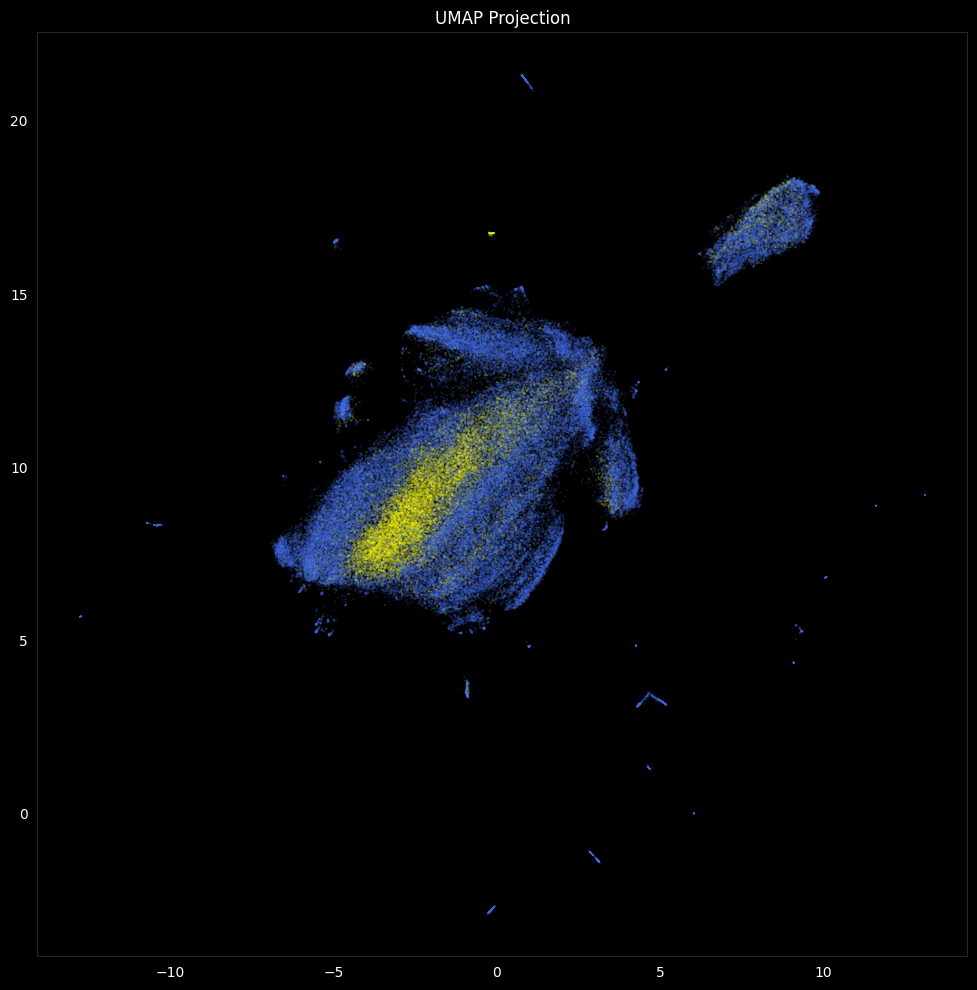

In [9]:
# Plot the result
plt = umap_plt(umap_embedding, y)
plt.show()

In [10]:
mean_point = embeddings[y==1].mean(axis=0)

In [11]:
median_point = np.median(embeddings[y==1], axis=0)

In [12]:
mean_umap = mapper.transform([mean_point])[0]
median_umap = mapper.transform([median_point])[0]

Sat Nov 23 17:46:21 2024 Worst tree score: 0.33184437
Sat Nov 23 17:46:21 2024 Mean tree score: 0.33873685
Sat Nov 23 17:46:21 2024 Best tree score: 0.34386554
Sat Nov 23 17:46:25 2024 Forward diversification reduced edges from 1598430 to 712802
Sat Nov 23 17:46:28 2024 Reverse diversification reduced edges from 712802 to 712802
Sat Nov 23 17:46:32 2024 Degree pruning reduced edges from 870454 to 857008
Sat Nov 23 17:46:32 2024 Resorting data and graph based on tree order
Sat Nov 23 17:46:32 2024 Building and compiling search function


Epochs completed:   0%|            0/100 [00:00]

	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs


Epochs completed:   0%|            0/100 [00:00]

	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs


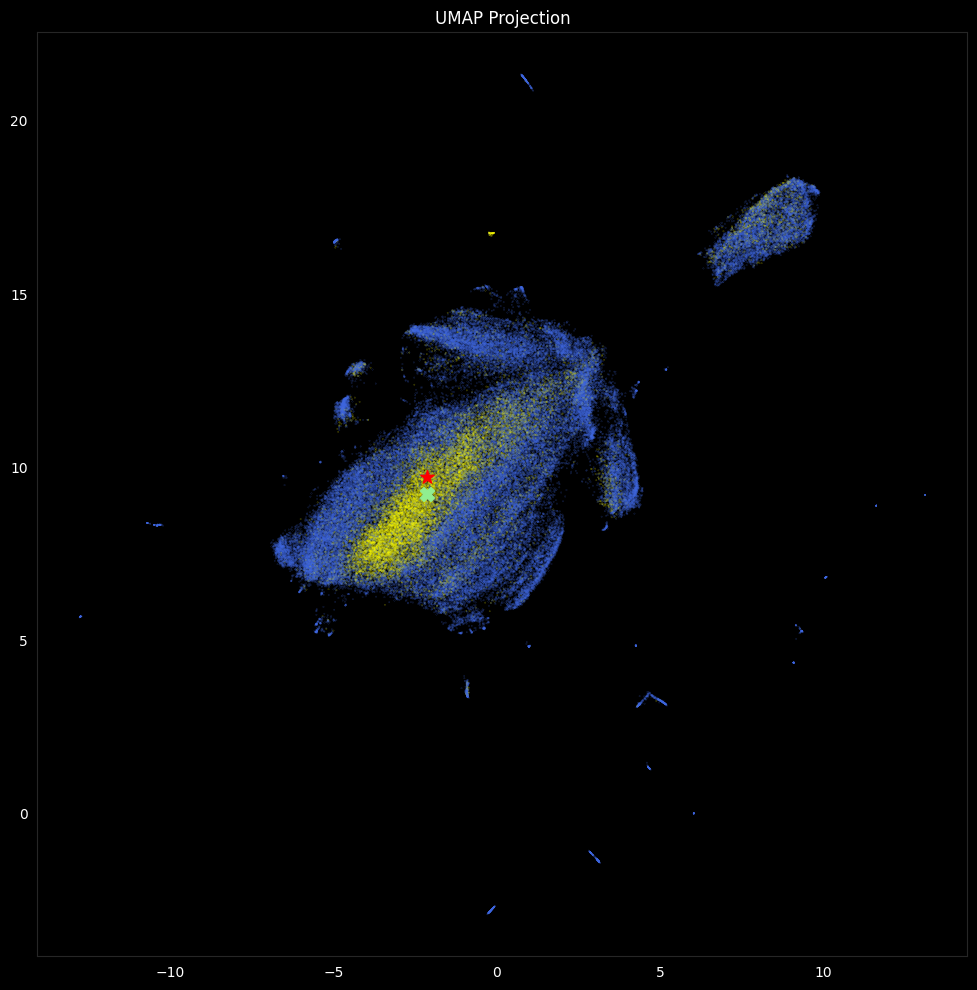

In [13]:
plt = umap_plt(umap_embedding, y)

plt.scatter(mean_umap[0], mean_umap[1], color='red', s=100, marker='*', label="Mean Point")
plt.scatter(median_umap[0], median_umap[1], color='lightgreen', s=100, marker='X', label="Median Point")

plt.show()

In [14]:
distances = np.linalg.norm(embeddings - median_point, axis=1)

In [15]:
df['distance'] = distances

In [16]:
df.sort_values(by='distance').reset_index(drop=True)[['url', 'title', 'distance']]

,url,title,distance
0,https://www.demotivateur.fr/insolite/video-un-...,Vidéo : un livreur de pizza sauve 5 enfants d'...,0.860509
1,https://www.huffingtonpost.fr/actualites/artic...,VIDÉO. Cet opossum d'Australie tente par tous...,0.867332
2,https://www.huffingtonpost.fr/actualites/artic...,VIDÉOS. Ce papa expert en effets spéciaux fa...,0.876456
3,https://www.huffingtonpost.fr/actualites/artic...,"PHOTOS. Architecture: Une ville roulante, le p...",0.878139
4,https://www.huffingtonpost.fr/actualites/artic...,"PHOTOS. Bode Miller, le skieur, défigure sa f...",0.879934
...,...,...,...
106557,https://www.rfi.fr/fr/podcasts/la-parlotte-de-...,Le mariage imaginaire,10.435413
106558,https://www.ladepeche.fr/2024/09/29/serenitarn...,Sérénitarn mobilisé,10.492617
106559,https://www.lemonde.fr/blog/uneanneeaulycee/20...,Octobre,10.510178
106560,https://www.rfi.fr/fr/podcasts/le-go%C3%BBt-du...,La cuisine de la consolation,10.565127


In [17]:
for row in df.sort_values(by='distance').reset_index(drop=True)[['url', 'title', 'distance']].head(10).itertuples(index=True, name='Row'):
    print(row.url, row.title, row.distance)

https://www.demotivateur.fr/insolite/video-un-livreur-de-pizza-sauve-5-enfants-d-une-maison-en-train-de-bruler-30318 Vidéo : un livreur de pizza sauve 5 enfants d'une maison en train de brûler 0.8605085611343384
https://www.huffingtonpost.fr/actualites/article/video-cet-opossum-d-australie-tente-par-tous-les-moyens-de-se-refugier-dans-la-poche-de-sa-mere_73778.html VIDÉO. Cet opossum d'Australie tente par tous les moyens de se réfugier dans la poche de sa mère 0.8673322200775146
https://www.huffingtonpost.fr/actualites/article/videos-ce-papa-expert-en-effets-speciaux-fait-encore-la-joie-de-son-fils_43301.html VIDÉOS. Ce papa expert en effets spéciaux fait (encore) la joie de son fils 0.8764564394950867
https://www.huffingtonpost.fr/actualites/article/photos-architecture-une-ville-roulante-le-projet-fou-de-l-espagnol-manuel-dominguez_26953.html PHOTOS. Architecture: Une ville roulante, le projet fou de l'espagnol Manuel Dominguez 0.8781391382217407
https://www.huffingtonpost.fr/act

In [18]:
df[df['funny']==0].sort_values(by='distance').reset_index(drop=True)[['url', 'title', 'distance']]

,url,title,distance
0,https://www.ouest-france.fr/normandie/mortagne...,Du sursis pour avoir menacé de mort son voisi...,0.900955
1,https://www.liberation.fr/idees-et-debats/opin...,Il y a quelque chose de détraqué dans l’Hexago...,0.912367
2,https://www.ouest-france.fr/societe/justice/cy...,L’animateur TV Cyrille Eldin condamné pour de...,0.914159
3,https://www.leparisien.fr/politique/il-est-en-...,Fête de l’Huma : après sa défaite aux légi...,0.915713
4,https://www.leparisien.fr/culture-loisirs/cine...,"Nathalie Fay, actrice dans le film « Very Bad ...",0.916820
...,...,...,...
86790,https://www.rfi.fr/fr/podcasts/la-parlotte-de-...,Le mariage imaginaire,10.435413
86791,https://www.ladepeche.fr/2024/09/29/serenitarn...,Sérénitarn mobilisé,10.492617
86792,https://www.lemonde.fr/blog/uneanneeaulycee/20...,Octobre,10.510178
86793,https://www.rfi.fr/fr/podcasts/le-go%C3%BBt-du...,La cuisine de la consolation,10.565127


In [19]:
for row in df[df['funny']==0].sort_values(by='distance').reset_index(drop=True)[['url', 'title', 'distance']].head(100).itertuples(index=True, name='Row'):
    print(row.url, row.title, row.distance)

https://www.ouest-france.fr/normandie/mortagne-au-perche-61400/du-sursis-pour-avoir-menace-de-mort-son-voisin-par-sms-dans-lorne-e272adf4-872b-11ef-a461-dc3a2eb2c9d7 Du sursis pour avoir menacé de mort son voisin par SMS dans l’Orne 0.9009547233581543
https://www.liberation.fr/idees-et-debats/opinions/il-y-a-quelque-chose-de-detraque-dans-lhexagone-par-johann-chapoutot-20240918_G2JNAKGZQZAGPKBH7L6S3PR2OQ/ Il y a quelque chose de détraqué dans l’Hexagone, par Johann Chapoutot 0.9123668670654297
https://www.ouest-france.fr/societe/justice/cyrille-eldin-condamne-pour-des-violences-psychologiques-sur-son-ex-compagne-b4c08be2-8a37-11ef-9d95-9a2a8aa75177 L’animateur TV Cyrille Eldin condamné pour des violences psychologiques sur son ex-compagne 0.9141591191291809
https://www.leparisien.fr/politique/il-est-en-mode-reconquete-apres-sa-defaite-aux-legislatives-fabien-roussel-remonte-en-selle-13-09-2024-G36ECM33SVGHBMWOLTOTAVQZLA.php Fête de l’Huma : après sa défaite aux législatives, Fabi